# Regresión Lineal (Linear Regression)

#### Autor: Jose Luis Milan

##### Paso 0: Importar los datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 25)

df = pd.read_csv('..\data\population.csv')

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jluis\AppData\Local\Temp\ipykernel_2436\1120016346.py:8: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\population.csv')


In [6]:
df.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


#### Paso 1: Entender los datos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          24 non-null     int64  
 1   Yearly % 
Change              24 non-null     float64
 2   Yearly
Change                 24 non-null     int64  
 3   Migrants (net)                23 non-null     float64
 4   Median Age                    24 non-null     float64
 5   Fertility Rate                24 non-null     float64
 6   Density (P/Km²)               24 non-null     int64  
 7   Urban
Pop %                   24 non-null     float64
 8   Urban Population              24 non-null     int64  
 9   Country's Share of
World Pop  24 non-null     float64
 10  World Population              24 non-null     object 
 11  India
Global Rank             24 non-null     int64  
 12  Population                    24 non-null     int64  
dtypes: floa

In [11]:
df.shape

(24, 13)

In [12]:
df.columns

Index(['Year', 'Yearly % \nChange', 'Yearly\nChange', 'Migrants (net)',
       'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban\nPop %',
       'Urban Population', 'Country's Share of\nWorld Pop', 'World Population',
       'India\nGlobal Rank', 'Population'],
      dtype='object')

In [13]:
df.describe

<bound method NDFrame.describe of     Year  Yearly % \nChange  Yearly\nChange  Migrants (net)  Median Age  \
0   2050               0.23         3711367             NaN        38.1   
1   2045               0.35         5585537       -414772.0        36.6   
2   2040               0.50         7793541       -415736.0        35.0   
3   2035               0.66        10016298       -415732.0        33.3   
4   2030               0.80        11726140       -440124.0        31.7   
5   2025               0.92        13001447       -464081.0        30.0   
6   2020               1.04        13970396       -532687.0        28.4   
7   2019               1.02        13775474       -532687.0        27.1   
8   2018               1.04        13965495       -532687.0        27.1   
9   2017               1.07        14159536       -532687.0        27.1   
10  2016               1.10        14364846       -532687.0        27.1   
11  2015               1.20        15174247       -470015.0       

#### Paso 2: Preparar los datos

Para nuestro ejercicio predeciremos la poblacion en función de la tasa de natalidad, para ello deberemos de hacer un subconjunto de datos con el que entrenaremos nuestro modelo.

In [14]:
df = df[['Fertility Rate', 'Population']].copy()

In [17]:
#Contar registros nulos
df.isna().sum()

Fertility Rate    0
Population        0
dtype: int64

Observamos que no contamos que registros nulos.

In [20]:
# Visualizar datos duplicados
df.loc[df.duplicated()]

,Fertility Rate,Population


In [21]:
df.head(5)

,Fertility Rate,Population
0,2.24,1639176033
1,2.24,1620619200
2,2.24,1592691513
3,2.24,1553723810
4,2.24,1503642322


#### EDA

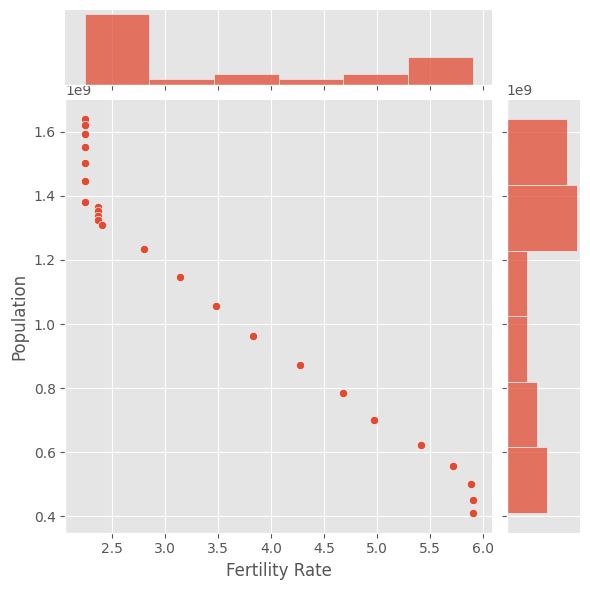

In [24]:
sns.jointplot(x='Fertility Rate', y='Population', data=df)

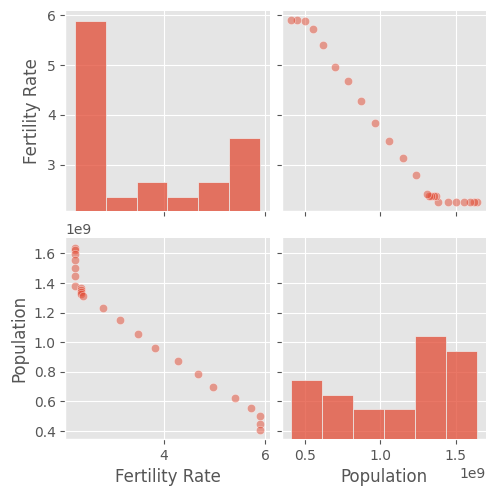

In [27]:
sns.pairplot(data=df, kind='scatter', plot_kws={'alpha': 0.5})

#### Implementación del modelo en Python

In [33]:
df

,Fertility Rate,Population
0,2.24,1639176033
1,2.24,1620619200
2,2.24,1592691513
3,2.24,1553723810
4,2.24,1503642322
5,2.24,1445011620
6,2.24,1380004385
7,2.36,1366417754
8,2.36,1352642280
9,2.36,1338676785


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

x = df[['Fertility Rate']]
y = df['Population']

# Dividir los datos en una proporcion 70% datos de entrenaminento y 30% datos de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(x_train, y_train)

# Predicir
model.predict(x_test)


array([1.41381456e+09, 8.98102217e+08, 1.44621533e+09, 7.09097694e+08,
       1.40301430e+09, 1.41381456e+09, 1.20320952e+09, 1.44621533e+09])

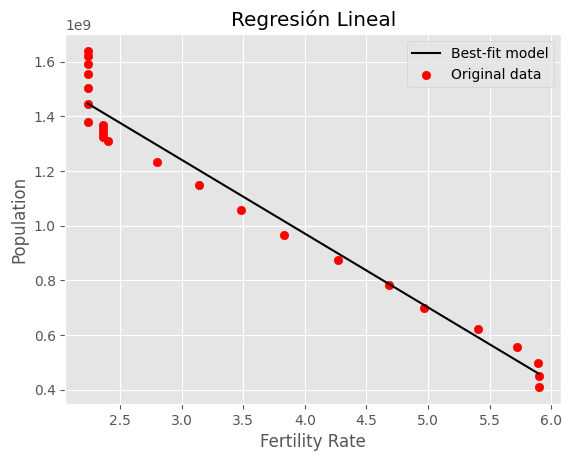

In [39]:
# Visualizar el modelo

a = model.coef_
b = model.intercept_

y_pred = a*x + b

plt.plot(x, y_pred, color='black', label='Best-fit model')
plt.scatter(x, y, color='red', label='Original data')

plt.legend()
plt.title('Regresión Lineal')
plt.xlabel('Fertility Rate')
plt.ylabel('Population')

plt.show()

In [44]:
# Error R^2
r2 = r2_score(y, y_pred)
# Error absoluto medio
mae = mean_absolute_error(y, y_pred)
# Error cuadratico medio
mse = mean_squared_error(y, y_pred)

print(f'Error R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Error R^2: 0.9585112259802652
MAE: 64566741.48493806
MSE: 6549387823102245.0
